In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
from keras.utils import to_categorical
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [5]:
dirname = os.path.join(os.getcwd(), 'plantasimagenes')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\User\IA_TF\plantasimagenes\
C:\Users\User\IA_TF\plantasimagenes\Diente de leon 1
C:\Users\User\IA_TF\plantasimagenes\Encino 475
C:\Users\User\IA_TF\plantasimagenes\Helechos 900
C:\Users\User\IA_TF\plantasimagenes\Manzano 525
C:\Users\User\IA_TF\plantasimagenes\Musgo 720
C:\Users\User\IA_TF\plantasimagenes\Orquideas 2637
C:\Users\User\IA_TF\plantasimagenes\Rosas 1500
C:\Users\User\IA_TF\plantasimagenes\Violetas 4250
Directorios leidos: 8
Imagenes en cada directorio [476, 900, 525, 720, 2637, 1500, 4250, 3599]
suma Total de imagenes en subdirs: 14607


In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

Cantidad etiquetas creadas:  14607


In [7]:
plantas=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    plantas.append(name[len(name)-1])
    indice=indice+1

0 Diente de leon
1 Encino
2 Helechos
3 Manzano
4 Musgo
5 Orquideas
6 Rosas
7 Violetas


In [8]:
y = np.array(labels)
X= np.array(images, dtype=np.uint8) #convierto de lista a numpy

# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Cantidad total de salidas : ', nClasses)
print('Salida de clases : ', classes)

Cantidad total de salidas :  8
Salida de clases :  [0 1 2 3 4 5 6 7]


In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Forma de datos de entrenamiento : ', train_X.shape, train_Y.shape)
print('Prueba de forma de datos : ', test_X.shape, test_Y.shape)

Forma de datos de entrenamiento :  (11685, 24, 28, 3) (11685,)
Prueba de forma de datos :  (2922, 24, 28, 3) (2922,)


Text(0.5, 1.0, 'Ground Truth : 4')

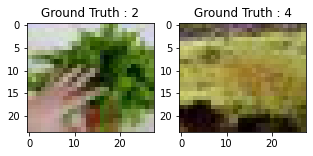

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 2
After conversion to one-hot: [0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(9348, 24, 28, 3) (2337, 24, 28, 3) (9348, 8) (2337, 8)


In [31]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 12 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [32]:
plantas_model = Sequential()
plantas_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(24,28,3)))
plantas_model.add(LeakyReLU(alpha=0.1))
plantas_model.add(MaxPooling2D((2, 2),padding='same'))
plantas_model.add(Dropout(0.5))

plantas_model.add(Flatten())
plantas_model.add(Dense(32, activation='linear'))
plantas_model.add(LeakyReLU(alpha=0.1))
plantas_model.add(Dropout(0.5))
plantas_model.add(Dense(nClasses, activation='softmax'))

In [33]:
plantas_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 28, 32)        896       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5376)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                172064    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32)               

In [34]:
plantas_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

In [35]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
# como ejemplo, en mi Macbook pro tarda 4 minutos
plantas_train = plantas_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))
print(plantas_train.history.keys())

Epoch 1/12
147/147 [==============================] - 2s 15ms/step - loss: 1.8444 - accuracy: 0.2804 - val_loss: 1.6399 - val_accuracy: 0.5237
Epoch 2/12
147/147 [==============================] - 2s 13ms/step - loss: 1.6679 - accuracy: 0.3935 - val_loss: 1.4570 - val_accuracy: 0.6033
Epoch 3/12
147/147 [==============================] - 2s 12ms/step - loss: 1.5377 - accuracy: 0.4592 - val_loss: 1.3179 - val_accuracy: 0.6128
Epoch 4/12
147/147 [==============================] - 2s 12ms/step - loss: 1.4255 - accuracy: 0.5062 - val_loss: 1.2051 - val_accuracy: 0.6598
Epoch 5/12
147/147 [==============================] - 2s 12ms/step - loss: 1.3223 - accuracy: 0.5474 - val_loss: 1.1086 - val_accuracy: 0.6842
Epoch 6/12
147/147 [==============================] - 2s 12ms/step - loss: 1.2439 - accuracy: 0.5774 - val_loss: 1.0275 - val_accuracy: 0.6979
Epoch 7/12
147/147 [==============================] - 2s 12ms/step - loss: 1.1881 - accuracy: 0.5961 - val_loss: 0.9604 - val_accuracy: 0.7283

In [36]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
plantas_model.save("plantas_mnist.h5py")

INFO:tensorflow:Assets written to: plantas_mnist.h5py\assets


In [37]:
test_eval = plantas_model.evaluate(test_X, test_Y_one_hot, verbose=1)

92/92 [==============================] - 0s 2ms/step - loss: 0.7500 - accuracy: 0.8032


In [38]:
print('Test precisión:', test_eval[0])
print('Test validación:', test_eval[1])

Test precisión: 0.7499871253967285
Test validación: 0.8032169938087463


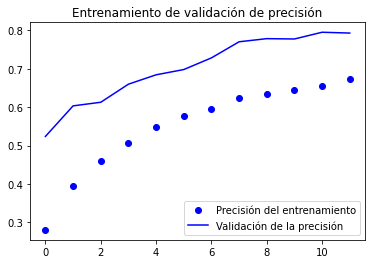

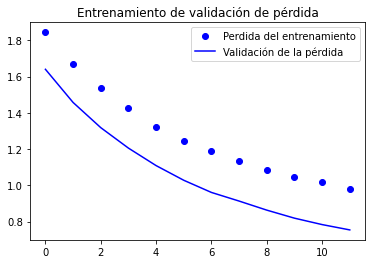

In [39]:
accuracy = plantas_train.history['accuracy']
val_accuracy = plantas_train.history['val_accuracy']
loss = plantas_train.history['loss']
val_loss = plantas_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precisión del entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Validación de la precisión')
plt.title('Entrenamiento de validación de precisión')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdida del entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Validación de la pérdida')
plt.title('Entrenamiento de validación de pérdida')
plt.legend()
plt.show()

In [40]:
predicted_classes2 = plantas_model.predict(test_X)

In [41]:
predicted_classes=[]
for predicted_plantas in predicted_classes2:
    predicted_classes.append(predicted_plantas.tolist().index(max(predicted_plantas)))
predicted_classes=np.array(predicted_classes)

In [42]:
predicted_classes.shape, test_Y.shape

((2922,), (2922,))

Encontró 2347 etiquetas correctas


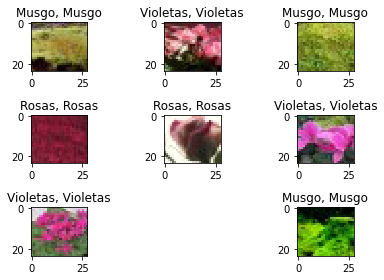

In [43]:
correct = np.where(predicted_classes==test_Y)[0]
print("Encontró %d etiquetas correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(24,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(plantas[predicted_classes[correct]],
                                                    plantas[test_Y[correct]]))

    plt.tight_layout()

Encontró 575 etiquetas incorrectas


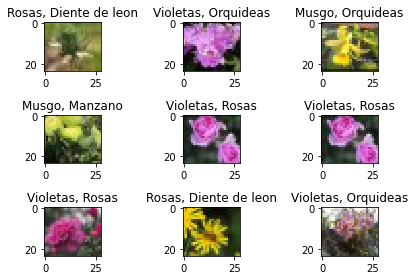

In [44]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Encontró %d etiquetas incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(24,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(plantas[predicted_classes[incorrect]],
                                                    plantas[test_Y[incorrect]]))
    plt.tight_layout()

In [45]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        85
     Class 1       0.80      0.97      0.88       172
     Class 2       0.99      1.00      1.00       103
     Class 3       1.00      0.04      0.07       141
     Class 4       0.71      0.96      0.81       508
     Class 5       1.00      0.31      0.48       303
     Class 6       0.87      0.86      0.86       869
     Class 7       0.78      1.00      0.87       741

    accuracy                           0.80      2922
   macro avg       0.77      0.64      0.62      2922
weighted avg       0.81      0.80      0.76      2922

